# Lecture 6

Numerically, the tâtonnement algorithm simply requires the computation of $P\left(\nabla u\left(X\right) = y_{k}\right) $ for a set of prices $\left(v_{k}\right)$. Equivalently, we need to evaluate the measure under distribution $P$ of the cells $\mathcal{X}_{k}^{v}$. These cells are polyhedron, and they are described by
\begin{align*}
\mathcal{X}_{j}^{v}=\left\{  x\in\mathcal{X}:x^{\intercal}\left(  y_{j}%
-y_{k}\right)  \geq v_{j}-v_{k},~\forall k\right\} 
\end{align*}
as intersections of half spaces. There are standard computational geometry routines that compute the Euclidian volume of such polyhedras. Hence, when $P$ is the Lebesgue measure, the problem can be addressed using existing tools. When $P$ is not the Lebesgue measure, there are no off-the-shelves tools to compute the measure of polyhedras. In that case, simulation methods should be used.

The R package `transport` provides useful resources for numerical optimal transportation, in particular power diagrams. This notebook provides an example of equilibrium price determination, when $P$ is the uniform over $[0,1]^2$. Initially the prices ˜$\tilde{v}$ are set to zero, and the initial demand configuration is a Voronoi diagram.

In [7]:
install.packages("transport")
install.packages("geometry")

Installing package into 'C:/Users/jmcgn/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'transport' is in use and will not be installed"Installing package into 'C:/Users/jmcgn/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependencies 'abind', 'magic'



package 'abind' successfully unpacked and MD5 sums checked
package 'magic' successfully unpacked and MD5 sums checked
package 'geometry' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jmcgn\AppData\Local\Temp\Rtmpi0h6cP\downloaded_packages


In [8]:
library("magick")  # For plotting animations
library("transport")
library("geometry")

SEED = 777
MAX_ITER = 1000
PREC = 0.01

set.seed(SEED)
nCells = 10

y1 = runif(nCells)
y2 = runif(nCells)
vtilde = rep(0, nCells)
q = rep(1/nCells, nCells)
demand = rep(0, nCells)
eps = 0.1  #tuning parameter

Loading required package: magic
Loading required package: abind


The prices adjust over time so that the area of the demand cells adjust to supply. Here, `y1`, `y2` and `vtilde` are vectors of size $10$ which represent respectively the first and second coordinates, and the prices of each of the ten fountains. The instruction

In [9]:
pwd = power_diagram(y1, y2, vtilde, rect = c(0, 1, 0, 1))

Computes the power diagram, which is a list of cells, represented by their extreme points, while

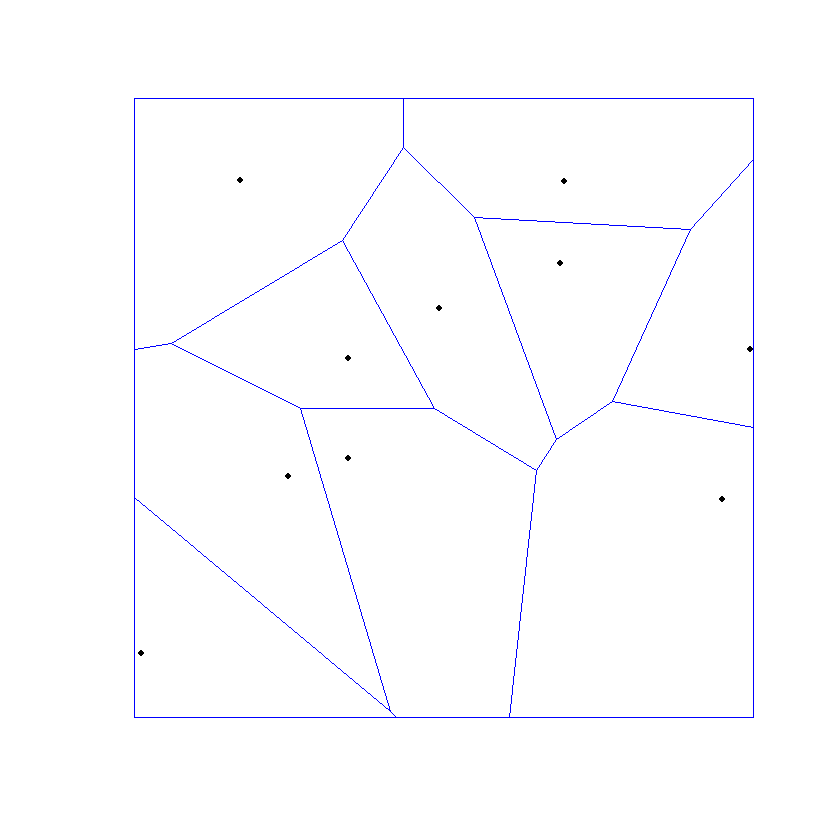

In [10]:
plot(pwd, weights = FALSE)

plots the power diagram (if `vtilde=0` this is the Voronoi diagram).

For each cell j, set `cellj=pwd$cells[[j]]`, and demand is computedusing

In [11]:
for (j in 1:nCells) {
    cellj = pwd$cells[[j]]
    demand[j] = polyarea(cellj[, 1], cellj[, 2])
}

where `polyarea`, from the ‘geometry’ package, computes the area of a cell. Finally, the prices are adjusted using:

In [12]:
vtilde = vtilde - eps * (demand - q)

where eps is a tuning parameter which controls the speed of adjustment of the process, and the configuration converges to equilibrium.

In [13]:
# Loop it

# create canvas
frames = image_graph(width = 600, height = 600, res = 150)

t = 1
cont = TRUE
while ((cont == TRUE) && (t < MAX_ITER)) {
    if (t%%10 == 0) {
        # Print on the screen some message
        cat(paste0("iteration: ", t, "\n"))
    }
    for (j in 1:nCells) {
        cellj = pwd$cells[[j]]
        demand[j] = polyarea(cellj[, 1], cellj[, 2])
    }
    if (max(abs(demand - q)) < PREC/nCells) {
        cont = FALSE
    } else {
        t = t + 1
        vtilde = vtilde - 0.1 * (demand - q)
        pwd = power_diagram(y1, y2, vtilde, rect = c(0, 1, 0, 1))
        plot(pwd, weights = FALSE)
    }
}

# animate
animation = image_animate(frames, 10)
image_write(animation, "powerdiagram.gif")
animation

# done with plotting
dev.off()

iteration: 10
iteration: 20
iteration: 30
iteration: 40
iteration: 50


<img src="data:image/gif;base64,R0lGODlhWAJYAvYAAAAAAAsLCxAQEBkZGSMjIywsLDMzMz09PUJCQkxMTFJSUltbW2NjY2tr
a3R0dHx8fAAA2QcH4A0N5g8P6BQU7AAA/wwM/xwc9RMT/xwc/yYm/ysr/zMz/zw8/0ND/0tL
/1RU/1xc/2Rk/2tr/3Nz/3x8/4KCgoyMjJSUlJ2dnaOjo62trbS0tL29vYSE/4yM/5OT/5yc
/6Oj/6ys/7S0/7y8/8TExMvLy9PT09zc3MPD/8zM/9TU/9zc/+Pj4+vr6+Pj/+zs//Pz8/T0
/////wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAACH5BAQKAAAAIf8LTkVUU0NBUEUyLjADAQAAACwAAAAAWAJY
AgAH/oBEgoOEhYaHiImKi4yNjo+QkZKTlJWWl5iZmpucnZ6foKGio6SlpqeoqaqrrK2ur7Cx
srO0tba3uLm6u7y9vr/AwcLDxMXGx8jJysvMzc7P0NHS09TV1tfY2drb3N3e3+Dh4uPk5ebn
6Onq6+zt7u/w8fLz9PX29/j5+vv8/f7/AAMKHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq
3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMq
Xcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rdu3/nDjyp1Lt67du3jz
6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLly5gza97MubPnz6BDix5NurTp06hT
q17NurXr17Bjy55Nu7bt27hz697Nu7fv38CDCx9OvLjx48iTK1/OvLnz59CjS59Ovbr169iz
a9/Ovbv37+DDix9Pvrz58+jTq1/Pvr379/Djy59Pv779+/jz69/Pv7///wC+UsGABBZo4IEI
Jqjgggw26OCDEEYo4YQUVmjhhRhmqOGAkWUwoAYghijiiCSWaOKJKKao4oostugigRu4KOOM
NNZo44045qjBgBlEtqMGCG3AYU0/+ljBBkEO/klTkZAxaZCQFdjkpGNTEgSllBUA2WSWCO0Y
JZFcbqmlQV5iOSaVYZKp5ExVMtamQGWCeWZjbwYU55JpojnnQHeymSedf/K5pkx1JlboP30S
Guhih/qTaEyNGhYpPx5+ieeejC5q56CQamqop4hyCtOkhJGqT6VmGonpppb6ueqnr/6Dgagv
mSqYrfgQSIOcqh5UQoEzXNprQT0cGKyisR6Gaz1eujACgceOCqqy0+rzAo+CPDugDJ0mK2m1
+ARBYA+DkEAgty4NQeCwAnEwIAmFmDtgDC552Sqg3t4jw4AWHPLrvCx1QGC+pYJbj7oD7oDI
vxXAoBIIBRI82LLw/ngwYAiKMOzwSdpmafDEH8tDw7qLuEDgCyaZPKAOFPvVMjsIV1BDI9cO
iPJI+w4Y7Mt88awOxBV88EjNFbggUg0EbuyzXkufowOBQ0BCtNEf7UAgvII0jZfW5VigsyQw
EFiCR0AQiPEgXNuVtjgiDNgBJWEPOPZGQ3hdwduErE2X3t/wQGAQlcRw9UazBsq3XIdXIoQP
xhROryWCv5sRlBgckjhcl0eCQwAAdG5C1MH8iyQmOVcwwi8+OEBAAilMY/GAoBeSuVuzO2JD
57gDYEAwxQ4IhCYzEHg6LynkDgABP0ATAoG/Wx5yYLUzMoTxuKsATLOcBD+gCLvkQD0A/go8
w7DCiES/lvmKeP/9Ab/U3GMn2lfAfS4MfA8A48zEXcGuiaCflv+IYIH9AOALcQ2IXJ4Y2cVy
IQD7tYAZ8Xtc/54HGAAewgf2S4AvoIS1TyiwAmezRQHsd4NlPG1AVFOEBc2yQkMM4HsP5EXk
KieKD4LgFiawnxCU0TvTNaKFZAEiIdSXuwX0ImbkEwXSBnTDWgjhe61LhgGD5gghisWKg/gB
AjoXgBX4QmDyM8USK9BEWvhghLhDgTLqNiAOPAKLYIEjMRTYr1OckIq2yMEKbJA8ZVTqfVWk
4F/kOAwCzQwVd/QAQdxVAQvE7oeCdFkkw/GBAQlNFYkUSCUH/gQ4SBCyK5/8xR0fiQqrDUiR
/+gYAj05yZ610ht2i9YqTHk3f6isAjqYRCi3sktetK2Wr/Abv1wAgxnUYAc9CAIp3xG5CsiS
lRK71Su3IcwKLHMV1WyQBTKwAQ+AYATENCYylRmOMW5Ml9PMSy914bhZ3HFDBNpmN79ZgmIe
M5nXPAYt50aJdWLFn7eQ1+hmAaUZzCAGzgqBBziQgcLBM0Hy7AA97TnOfM6ihyHsZzq3tlFr
9LB5s1BgRhMxhCD0gAc1OGhCF9rQhypInt4cQT2NyQN8omKKqLQEQK2yU1p46Wa1IFknSnpS
Hah0BAplqENdaqCITlScNq1E4Qaq/tOOqs2q03AfLoDGP1eUFAgoPapCY7RUpsaTmxKVKUV7
AITYeYmGmOgpVeQKi7IdEBfCdGMwvsoDoyIUqSwtq1n5ZdFI0FUqh3UFB3Vht8Img6h9FetC
NWC3CYE0rljdW2afMcNd/Ouc4oCsDmjw16QSKIWZSCxUVKsKJO7CgIBsh13hqgnWOsW2qHjd
/HbhpVWyA2jo2gRumTLcUujPF9obHsyEKtzNIs65ymBYLn3BXHXIC7W1hS7mtGuMGlS2Apfd
xSanuw6oeaK4SkGvJ4LwugLhrRemzGk6IjfS7EYTetwVxi0rwIEg2I0Hv6juOewWXvuyCxw6
qKwF+Ke9/vu6Ql4SPMcS39sJ9SLFwpdgb4E6KIhKdXUXdnUwNryUxArnty0YrgTR+FvgE9J2
F5UqsDiEGVsTi1iSN1aGDpb64UIwMsK6iBw/y/G6HnMixUVB8iOCsEnJKaKHvojZOaYoCiUP
xcqMWDEHZGwIoA1ZF2AEcDl+CdrznpgtWE7EDpb6TEVM0bGyOOElySFgGx94GkNosg8joa3d
7qLO3qiZckGRZqAUmhD6OxKXGcG8Xvyyzd742ygO7RNKrxlYlqiZfHPRO6p+Q3ub/gSle1Lo
IQBte5kgkJh3UbhOgqNSviX0mc83a1UkegOxroT2PI2LmmGXG6bktahr/T9i/puCB5X6GicK
d0hdIOzFn/ABC0zQgh3egpHNrrKxz4JkUxfIz5twcS8YuepPoMB4NrCFXetIilHzJMXNzFKu
NwGl4OZCpKFYwffwN4vlVQDIoXD3TiyM7ALZ+xPV7AWgMTG97yGAFlI2hcB1gt4h+HuBpdjk
r23hbyNnAoP2o8W/vqztHLvS5LGIdwbKPYo37yKv0R4gLcwr8W2z0OaZ4IG9KnDwUvSZF431
RMOptztZRK6MpZh4Tlhr8QLV1xQxczUuVFZmTZzgeziYReEWPWyUMw3nlShdBVbuCpXNGRcG
hLYm6pe7KMZiiXo9hdJxclidFwjgqxgXb30HChs8/gABKMgBLaBU4qSDfSxyHcIvmTiLXe9C
e+CeRu/UPunDX9HyjYjf2FkOi8KRFxcLf8YmIV15r6sT80/eedXfPiDKz2K81qCyKuZ+E38u
noxwbkVBdRFfa2gLqKigfapuoXmy6yLhugg9M5QfcNR/JZRAgNKAVn+L1wHfFhCmRs0iX3PT
c9T7m+hY0HIvC7veqxZ2rfEz7Cb14DvfK3LUPAYK7+gBDdoWMZaGAkMt9/eDEvPRVyDX9wtR
lwtCJg2Vwnn9B35XxYCUIC+WRH

   format width height colorspace matte filesize density
1     gif   600    600       sRGB  TRUE        0   72x72
2     gif   600    600       sRGB  TRUE        0   72x72
3     gif   600    600       sRGB  TRUE        0   72x72
4     gif   600    600       sRGB  TRUE        0   72x72
5     gif   600    600       sRGB  TRUE        0   72x72
6     gif   600    600       sRGB  TRUE        0   72x72
7     gif   600    600       sRGB  TRUE        0   72x72
8     gif   600    600       sRGB  TRUE        0   72x72
9     gif   600    600       sRGB  TRUE        0   72x72
10    gif   600    600       sRGB  TRUE        0   72x72
11    gif   600    600       sRGB  TRUE        0   72x72
12    gif   600    600       sRGB  TRUE        0   72x72
13    gif   600    600       sRGB  TRUE        0   72x72
14    gif   600    600       sRGB  TRUE        0   72x72
15    gif   600    600       sRGB  TRUE        0   72x72
16    gif   600    600       sRGB  TRUE        0   72x72
17    gif   600    600       sR

png 
  2

Alternatively we could use the `Rgeogram` package from the `TraME` library 

In [15]:
library(Rgeogram)
vtilde_alt = otm2D(cbind(y1, y2), weights = q)$weights